In [1]:
import ast
import pandas as pd 
import matplotlib.pyplot as plt
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [3]:
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

In [4]:
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month

In [5]:
df_DA_explode = df_DA.explode('job_skills')

In [6]:
df_DA_pivot = df_DA_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

In [7]:
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()

In [8]:
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]

In [9]:
df_DA_pivot = df_DA_pivot.drop('Total')

In [10]:
# Use months name for plotting 
df_DA_pivot = df_DA_pivot.reset_index()
df_DA_pivot['job_posted_month'] = df_DA_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_pivot = df_DA_pivot.set_index('job_posted_month')
df_DA_pivot = df_DA_pivot.drop(columns='job_posted_month_no')
df_DA_pivot

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,...,angular.js,xamarin,gtx,nuxt.js,ovh,esquisse,suse,capacitor,chainer,msaccess
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251,...,2,0,0,1,0,0,0,1,0,0
Feb,7947,5772,4751,3936,3307,2576,2634,1291,1235,954,...,0,0,0,0,0,0,0,0,0,0
Mar,7868,5675,4741,4051,3176,2650,2554,1266,1203,892,...,0,1,0,0,0,0,1,0,0,0
Apr,7553,5496,4557,3776,3106,2399,2598,1190,1177,947,...,0,0,0,0,1,0,0,0,0,0
May,6617,4773,4070,3245,2695,2093,1940,979,957,851,...,0,0,0,0,0,0,0,0,0,1
Jun,7584,5724,4707,3812,3275,2442,2174,1173,1237,987,...,0,0,0,0,0,0,0,0,0,0
Jul,7687,5513,4831,3928,3350,2444,2118,1096,1069,996,...,0,0,1,0,0,0,0,0,0,0
Aug,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117,...,0,0,0,0,0,0,0,0,0,0
Sep,6829,4886,4229,3446,3118,2146,1880,944,945,852,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df_DA_pivot.iloc[:, :5]

job_skills,sql,excel,python,tableau,power bi
job_posted_month,,,,,
Jan,11336,8170,6606,5596,4285
Feb,7947,5772,4751,3936,3307
Mar,7868,5675,4741,4051,3176
Apr,7553,5496,4557,3776,3106
May,6617,4773,4070,3245,2695
Jun,7584,5724,4707,3812,3275
Jul,7687,5513,4831,3928,3350
Aug,8823,6482,5576,4533,3859
Sep,6829,4886,4229,3446,3118


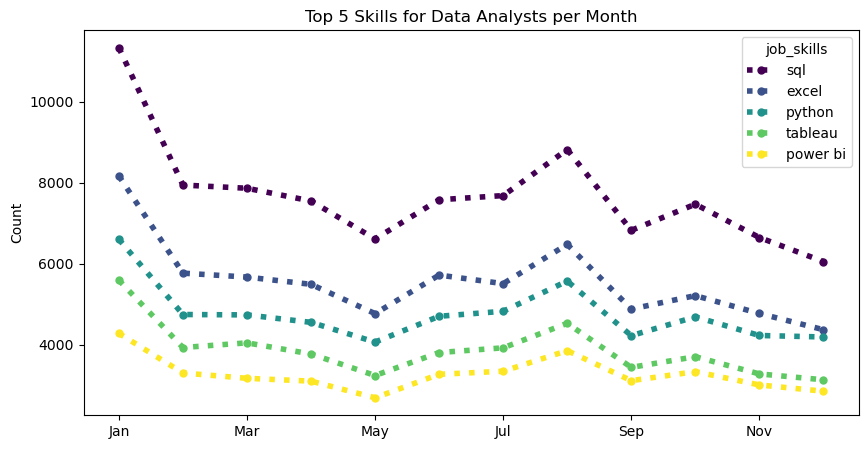

In [13]:
df_DA_pivot.iloc[:, :5].plot(
    kind='line',
    linewidth=4, 
    linestyle=':', # options: '-', '--', '-.', ':'
    colormap='viridis', # options: 'viridis', 'plasma', 'inferno', 'magma', 'cividis' 
    marker='o', # options: 'o', 'x', '+', 's', '1' ...
    markersize=5,
    figsize=(10,5) 
)
plt.title('Top 5 Skills for Data Analysts per Month')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

# Scatter example

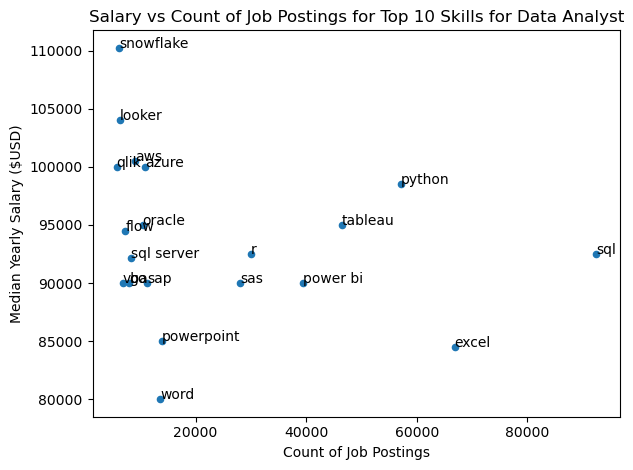

In [15]:
# create df_DA to store Data Analyst jobs
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

# explode 'job_skills' in individual rows
df_DA_exploded = df_DA.explode('job_skills')

# Calculate the average salary and count of job postings per skill
skill_stat = df_DA_exploded.groupby('job_skills').agg(
    skill_count=('job_skills', 'count'),
    median_salary=('salary_year_avg', 'median')
)

# Limit to top skills
skill_count = 20
skills_stat = skill_stat.sort_values(by='skill_count', ascending=False).head(skill_count)

# Plotting
skills_stat.plot(kind='scatter', x='skill_count', y='median_salary')

for i, txt in enumerate(skills_stat.index):
    plt.text(skills_stat['skill_count'].iloc[i], skills_stat['median_salary'].iloc[i], txt)

plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Salary vs Count of Job Postings for Top 10 Skills for Data Analyst')
plt.tight_layout()    
plt.show()


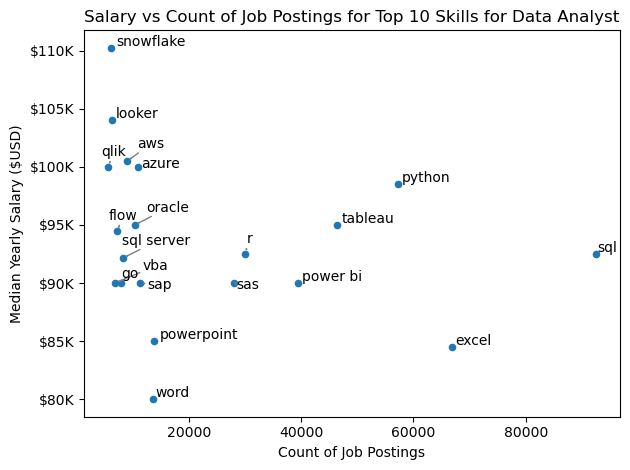

In [23]:
from adjustText import adjust_text

# two ways to specify -ax-
# fig, ax = plt.subplots()      
# ax = plt.gca()

# Plotting
skills_stat.plot(kind='scatter', x='skill_count', y='median_salary')

texts = []
for i, txt in enumerate(skills_stat.index):
    texts.append(plt.text(skills_stat['skill_count'].iloc[i], skills_stat['median_salary'].iloc[i], txt))     # important 

adjust_text(texts, arrowprops=dict(arrowstyle="->", color='grey'))    # important 

ax = plt.gca()    # important                                                                     
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))    # important

plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Salary vs Count of Job Postings for Top 10 Skills for Data Analyst')
plt.tight_layout()    
plt.show()
 